# Loading and nomalizing datasets

Pytorch에서 제공하는 Data 로드 모듈
- `torch.utils.data.Dataset`
- `torch.utils.data.DataLoader`

# Datasets and Dataloaders

In [1]:
%matplotlib inline
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

# root : 저장 위치
# trian : train과 test로 split
# download : root에서 다운로드 불가능할 경우, 인터넷에서 다운로드 가능
# transform : tensor 형태로 변환, pytorch는 tensor만 읽을 수 있다. 

training_data = datasets.FashionMNIST (
    root = 'data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [2]:
type(training_data)

torchvision.datasets.mnist.FashionMNIST

In [3]:
len(training_data)

60000

In [4]:
torch.randint(len(training_data), size=(1,2,3))

tensor([[[23750, 52055,  6722],
         [28056, 39135, 51661]]])

In [5]:
torch.randint(len(training_data), size=(1,))

tensor([55787])

In [8]:
torch.randint(len(training_data), size=(1, )).item()

35383

In [9]:
# 첫 번째 return 값들은 feature 값들이고, 두번째 return 값은 target label 
training_data[35383]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [10]:
# 이미지 정보 불러오기, 28*28 정사각형의 형태 
training_data[35383][0].shape

torch.Size([1, 28, 28])

In [14]:
training_data[35383][0].squeeze().shape

torch.Size([28, 28])

## Iterating and Visualizing

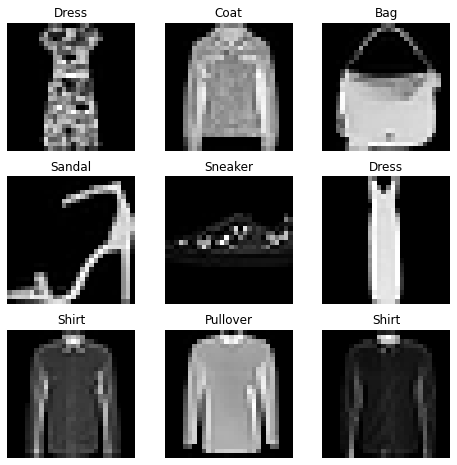

In [17]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3

for i in range (1, cols*rows+1) :
  sample_idx = torch.randint(len(training_data), size=(1, )).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Prepariing data for training with DataLoaders

In [18]:
from torch.utils.data import DataLoader

# 객체를 실행시킬 때마다 64개의 이미지 데이터셋과 라벨 셋을 한번에 가져온다. 
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## Iterate through the DataLoader

In [19]:
train_features, train_labels = next(iter(train_dataloader))

# 64개의 흑백 이미지가 28*28 사이즈이다 
print(f'Feature baatch shape : {train_features.size()}')
print(f'Labels batch shape : {train_labels.size()}')

Feature baatch shape : torch.Size([64, 1, 28, 28])
Labels batch shape : torch.Size([64])


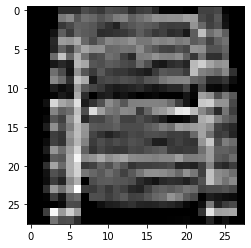

Label : 6


In [20]:
# 첫번째 이미지 추출하기 
# squeeze를 통해 batch값 제거 
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label : {label}')

# Nomarlization (정규화)
- scale을 0-1 사이로 변경
- 학습 전에 시행 필요
  - Local Minima에 빠질 위험 감소, 학습 속도 향상

## Transforms 

In [24]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download=True,
    transform=ToTensor(),
    # 해당 위치의 점을 1로 바꾸겠다는 뜻 
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
    )

In [25]:
sample_idx = torch.randint(len(ds), size=(1,)).item()
sample_idx 

54163

In [26]:
# 원핫인코딩 과정과 비슷, 라벨을 모두 1과 0 사이로 바꿔주어야 한다. 
# 모든 load 값은 선형 회귀 시 1 이상의 값을 가지면 안 된다. 

_, ds_label = ds[sample_idx]
_, traing_label = training_data[sample_idx]

print(f'ds_label: {ds_label} / traing_label: {traing_label}')

ds_label: tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]) / traing_label: 0
